# Logistic Regression

## Model

In [1]:
import numpy as np


class Logistic(object):
    def __init__(self, dim):
        self.weights = np.zeros(dim)
    
    def use_labeled_images(self, data_set):
        self.inputs = data_set.images
        self.targets = data_set.labels

    def activation_function(self, z):
        return 1 / (1 + np.exp(-z))
    
    def gradient(self):
        t = self.targets
        y = self.outputs()
        x = self.inputs
        return -np.tensordot((t - y), x, axes=[0, 0])
    
    def loss_function(self):
        t = self.targets
        y = self.outputs()
        # We want to make sure log(y) won't go crazy.
        threshold = 1e-12
        y[y < threshold] = threshold
        y[y > 1 - threshold] = 1 - threshold
        return -(t * np.log(y) + (1 - t) * np.log(1 - y)).mean()
                             
    def outputs(self):
        f = self.activation_function
        w = self.weights
        x = self.inputs
        return f(np.tensordot(w, x, axes=[0, 1]))
    
    def percent_correct(self):
        y = self.outputs()
        t = self.targets
        correct = ((y > 0.5) & (t == 1)) | ((y < 0.5) & (t ==0))
        return correct.sum() / correct.size

    def update(self, rate, lam):
        self.weights = self.weights - rate * self.gradient()

## Experiments

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from data import read_logistic_data_sets
from tools import train

### 2 vs 3

In [3]:
dss23 = read_logistic_data_sets(2, 3)

In [4]:
# Annealing
def rate(t):
    r0 = 1e-3
    T = 100
    return r0 / (1 + t/T)

In [5]:
%%time
results = train(Logistic, dss23,
                rate=rate, lam=0, epoch_min=500, epoch_max=500)

/Users/qobilidop/miniconda3/envs/cse253/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


CPU times: user 2min 4s, sys: 31.1 s, total: 2min 35s
Wall time: 1min 18s


In [6]:
results.record.tail()

,E_hold,E_test,E_train,c_hold,c_test,c_train
496,1.084872,0.581848,0.652481,0.960737,0.978942,0.976386
497,1.062732,0.581274,0.639737,0.961538,0.978942,0.976847
498,1.062732,0.581848,0.648124,0.961538,0.978942,0.976478
499,1.062732,0.568317,0.647383,0.961538,0.979432,0.976570
500,1.062732,0.568317,0.644835,0.961538,0.979432,0.976663


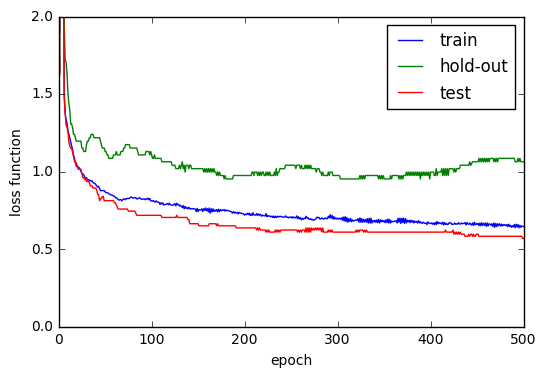

In [7]:
results.plot_loss_function()
plt.savefig('figs/logistic_23_E.pdf')
plt.ylim(0, 2)
plt.savefig('figs/logistic_23_E_zoom.pdf')

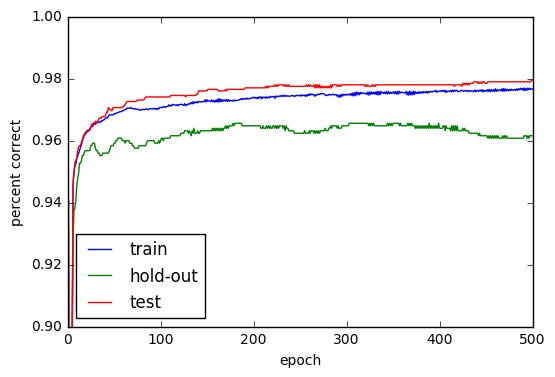

In [8]:
results.plot_percent_correct()
plt.savefig('figs/logistic_23_c.pdf')
plt.ylim(0.9, 1)
plt.savefig('figs/logistic_23_c_zoom.pdf')